**Iris Dataset**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
iris = pd.read_csv('iris.csv')

# Display column names to find the target column
print("Column names:", iris.columns)

# Try auto-detecting the label column (assuming it's the last one)
target_col = iris.columns[-1]

# If it's categorical (like string labels), encode it
if iris[target_col].dtype == 'object' or not pd.api.types.is_numeric_dtype(iris[target_col]):
    le = LabelEncoder()
    iris[target_col] = le.fit_transform(iris[target_col])

# Split into features and target
X = iris.drop(target_col, axis=1)
y = iris[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))

Column names: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Linear Kernel Accuracy: 1.0
Confusion Matrix (Linear):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:
# Train and evaluate with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))


RBF Kernel Accuracy: 1.0
Confusion Matrix (RBF):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Letter-Recognition Dataset**

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Load letter-recognition dataset
letters = pd.read_csv('letter-recognition.csv')

# Assume the first column is the target (class label), rest are features
X = letters.iloc[:, 1:]
y = letters.iloc[:, 0]

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# One-vs-Rest strategy for multiclass ROC
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

# Binarize labels for ROC
y_test_binarized = label_binarize(y_test, classes=list(range(len(le.classes_))))

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average="macro")

# Accuracy and Confusion Matrix
y_pred = classifier.predict(X_test)
print("Letter Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Letter Dataset Accuracy: 0.62525
Confusion Matrix:
 [[131   0   0   0   0   0   0   1   0   3   3   0   0   0   7   0   0   2
    1   0   0   0   1   0   0   0]
 [  0  72   0  17   1   1   1  11   0   0   0   0   0   0  24   3   0  12
    2   0   0   1   0   8   0   0]
 [  0   0 104   0   5   0   0   7   0   0   5   1   0   1   7   0   4   0
    0   1   1   1   0   0   0   0]
 [  0   1   0 110   0   0   2   1   1   3   0   1   2   0  24   1   0   0
    1   2   0   0   0   6   0   1]
 [  0   2  45   0  13   0  12   8   2   0  13   2   0   0  11   0   8   6
    0   0   1   0   0  11   1   6]
 [  0   4   0   1   0  76   9   6   2   0   1   0   0   1  19   8   1   1
    1   6   0   0   0   3   0   1]
 [  0   4  23   0   1   0  24  54   1   0  12   3   0   0   8   0  11  12
    1   0   0   0   1   5   0   0]
 [  3   2   0   5   0   1  12  36   0   5   4   0   2   3  36   5   0  15
    0   1   7   0   0   5   2   0]
 [  0   2   0   1   0   0   4   0 117   2   0   0   0   0   5   1   0   0
  

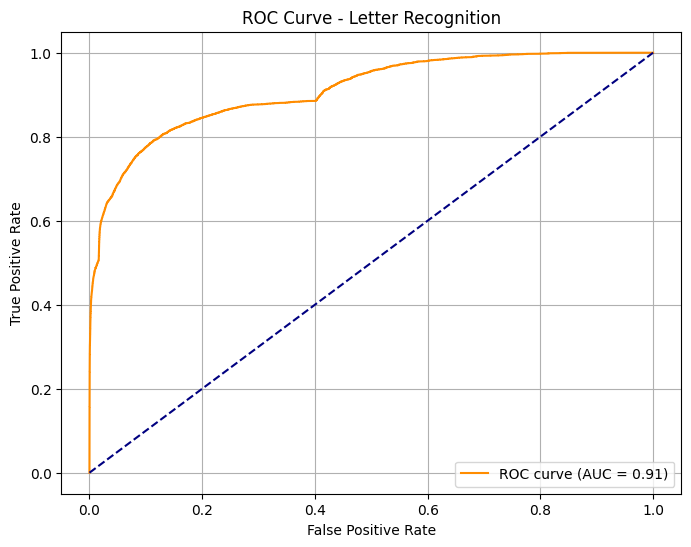

In [17]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Letter Recognition')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()